In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

In [10]:
def imageOperations(image):
    image_g = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    image_blurred = cv2.GaussianBlur(image_g, (7, 7), 0)
    
    
    threshold_low = 20
    threshold_high = 80
    image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high)
    plt.imshow(image_canny, cmap='gray')
    
    #Definindo a região de interesse
    #vertices = np.array([[(20,460), (450, 300), (460, 300), (650,470)]], dtype=np.int32)
    #mask = np.zeros_like(image)
    #cv2.fillPoly(mask, vertices, 25)
    #masked_image = cv2.bitwise_and(image_g, mask)
    #plt.figure()
    #masked_image = cv2.bitwise_and(image_canny, mask)
    
     #desenhando as linhas
    rho = 2   #distancia da resolucao em pixels
    theta = np.pi/180 # resolucao angular em radianos
    threshold = 40  #Numero minimo de votos
    min_line_len = 100 # numero minimo de pixel mascarando a linha
    max_line_gap = 50 #espaço maximo em pixel entre segmentos de linha conetaveis
    lines = cv2.HoughLinesP(image_canny, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
    #Criando uma imagem preta vazia
    line_image = np.zeros((image_canny.shape[0], image_canny.shape[1], 3), dtype=np.uint8)

    α = 1
    β = 1
    γ = 0
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 2)
    
    image_with_lines = cv2.addWeighted(image_canny, α, line_image, β, γ)
    
    return image_with_lines

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:663: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


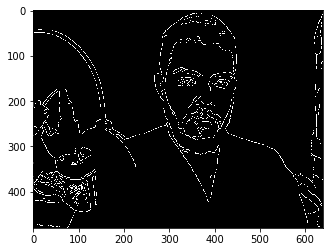

In [11]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read() #cap.read() retorna um booleano ret para indicar o sucesso da conexao
    cv2.imshow('Live TESTE', imageOperations(frame))
    
    if cv2.waitKey(1) == 13: #Pressionar enter
        break
        
cap.release() #Liberta a camera
cv2.destroyAllWindows()